In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
listing=pd.read_csv(r'C:\Users\fawad\HouseListings.csv', encoding='latin-1')
print(listing)

          City      Price                     Address  Number_Beds  \
0      Toronto   779900.0       #318 -20 SOUTHPORT ST            3   
1      Toronto   799999.0       #818 -60 SOUTHPORT ST            3   
2      Toronto   799900.0     #714 -859 THE QUEENSWAY            2   
3      Toronto  1200000.0            275 MORTIMER AVE            4   
4      Toronto   668800.0       #420 -388 RICHMOND ST            1   
...        ...        ...                         ...          ...   
35763  Halifax   439900.0  301 60 Walter Havill Drive            2   
35764  Halifax  6990000.0      1160 Rockcliffe Street            5   
35765  Halifax   419900.0  212 60 Walter Havill Drive            2   
35766  Halifax   949900.0           10 Idlewylde Road            3   
35767  Halifax   592900.0     208 2842-2856 Gottingen            2   

       Number_Baths     Province  Population  Latitude  Longitude  \
0                 2      Ontario     5647656   43.7417   -79.3733   
1                 1  

# Exploratory Data Analysis

In [3]:
listing.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [5]:
listing.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [6]:
# Check for missing values
missing_values = listing.isnull().sum()
print("\nMissing values in each column:")
display(missing_values)


Missing values in each column:


City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [7]:
print("\nUnique values in each column:")
for column in listing.columns:
    print(f"{column}: {listing[column].nunique()} unique values")


Unique values in each column:
City: 45 unique values
Price: 4366 unique values
Address: 31379 unique values
Number_Beds: 31 unique values
Number_Baths: 22 unique values
Province: 9 unique values
Population: 45 unique values
Latitude: 45 unique values
Longitude: 44 unique values
Median_Family_Income: 32 unique values


In [8]:
print(listing[listing['City'] == 'Edmonton'])

          City     Price              Address  Number_Beds  Number_Baths  \
3926  Edmonton  460000.0       9312 82 Street            3             2   
3927  Edmonton  419000.0      3412 138 Avenue            4             3   
3928  Edmonton  359000.0   40-9718 176 Street            4             3   
3929  Edmonton  499900.0     16108 78A Avenue            4             3   
3930  Edmonton  379500.0     19056 72A Avenue            4             3   
...        ...       ...                  ...          ...           ...   
5272  Edmonton  585000.0     10615 134 Street            4             2   
5273  Edmonton  829000.0  213-10116 80 Avenue            2             2   
5274  Edmonton  259000.0  202-10524 29 Avenue            2             1   
5275  Edmonton  245000.0       7308 86 Avenue            5             3   
5276  Edmonton  124888.0      12109 87 Street            2             2   

     Province  Population  Latitude  Longitude  Median_Family_Income  
3926  Alberta   

# Edmonton House Prices Analysis

In [9]:
Edmonton_listings=listing[listing['City'] == 'Edmonton']

In [10]:
Edmonton_listings.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
3926,Edmonton,460000.0,9312 82 Street,3,2,Alberta,1151635,53.5344,-113.4903,96000.0
3927,Edmonton,419000.0,3412 138 Avenue,4,3,Alberta,1151635,53.5344,-113.4903,96000.0
3928,Edmonton,359000.0,40-9718 176 Street,4,3,Alberta,1151635,53.5344,-113.4903,96000.0
3929,Edmonton,499900.0,16108 78A Avenue,4,3,Alberta,1151635,53.5344,-113.4903,96000.0
3930,Edmonton,379500.0,19056 72A Avenue,4,3,Alberta,1151635,53.5344,-113.4903,96000.0


In [11]:
#For the sake of simplicity, we will just keep the columns price, number_beds and number_baths. Later, we will use ML techniques to predict the house price based on number of beds and baths.
Edmonton_listings=Edmonton_listings.drop(['City','Province','Address','Population','Latitude','Longitude','Median_Family_Income'],axis=1)

In [12]:
Edmonton_listings.head()

,Price,Number_Beds,Number_Baths
3926,460000.0,3,2
3927,419000.0,4,3
3928,359000.0,4,3
3929,499900.0,4,3
3930,379500.0,4,3


In [13]:
Edmonton_listings.describe()

,Price,Number_Beds,Number_Baths
count,1.351000e+03,1351.000000,1351.000000
mean,4.255820e+05,3.037750,2.290896
std,3.523534e+05,1.444036,1.136166
min,5.590000e+04,0.000000,0.000000
25%,2.180000e+05,2.000000,2.000000
50%,3.499000e+05,3.000000,2.000000
75%,4.999000e+05,4.000000,3.000000
max,4.463445e+06,9.000000,12.000000


In [14]:
Edmonton_listings = Edmonton_listings.dropna(subset=['Price'])

In [15]:
Edmonton_listings['Price'] = Edmonton_listings['Price'].astype(int)

In [16]:
Edmonton_listings.head()

,Price,Number_Beds,Number_Baths
3926,460000,3,2
3927,419000,4,3
3928,359000,4,3
3929,499900,4,3
3930,379500,4,3


In [17]:
# Creating 2 bins based on price, 1st bin=300000-700000, 2nd bin: 700000-5000000.
# We will use the 1st bin as high_affordibility option and the 2nd bin as low_affordibility.

bins=(300000,700000,5000000)
group_names=['high_affordibility','low_affordibility']
Edmonton_listings['Price']=pd.cut(Edmonton_listings['Price'], bins= bins, labels=group_names)
Edmonton_listings['Price'].unique()

[high_affordibility, low_affordibility, NaN]
Categories (2, object): [high_affordibility < low_affordibility]

In [18]:
label_price=LabelEncoder()

In [19]:
Edmonton_listings = Edmonton_listings.dropna(subset=['Price'])

In [20]:
Edmonton_listings['Price']=label_price.fit_transform(Edmonton_listings['Price'])

In [21]:
Edmonton_listings.head(20)

,Price,Number_Beds,Number_Baths
3926,0,3,2
3927,0,4,3
3928,0,4,3
3929,0,4,3
3930,0,4,3
3931,0,4,2
3932,1,2,2
3933,0,3,3
3935,0,3,2
3936,0,3,3


In [22]:
Edmonton_listings['Price'].value_counts()

0    665
1    156
Name: Price, dtype: int64

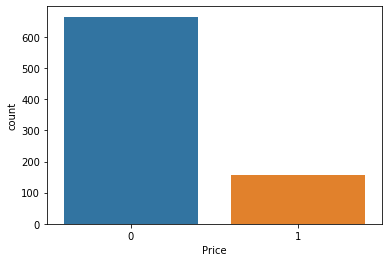

In [23]:
sns.countplot(Edmonton_listings['Price'])

In [24]:
X=Edmonton_listings.drop('Price',axis=1)
y=Edmonton_listings['Price']

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Random Forest Classifier

In [27]:
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [28]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       140
           1       0.80      0.16      0.27        25

    accuracy                           0.87       165
   macro avg       0.83      0.58      0.60       165
weighted avg       0.86      0.87      0.83       165

[[139   1]
 [ 21   4]]


# SVM Classifier

In [29]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [30]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       140
           1       0.75      0.12      0.21        25

    accuracy                           0.86       165
   macro avg       0.81      0.56      0.57       165
weighted avg       0.85      0.86      0.81       165

[[139   1]
 [ 22   3]]


# Neural Network

In [31]:
mlpc=MLPClassifier(hidden_layer_sizes=(9,9,9),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)


In [32]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       140
           1       0.80      0.16      0.27        25

    accuracy                           0.87       165
   macro avg       0.83      0.58      0.60       165
weighted avg       0.86      0.87      0.83       165

[[139   1]
 [ 21   4]]
